In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#get list of columns in measurement table
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

# Exploratory Precipitation Analysis

In [11]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Design a query to retrieve the last 12 months of precipitation data
# Starting from the most recent data point in the database. 
recent_date_as_date = dt.datetime.strptime(recent_date[0],'%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
one_year = recent_date_as_date - dt.timedelta(days=365)
one_year_string = one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date <=recent_date[0]).\
            filter(Measurement.date >=one_year_string).all()


In [12]:
prcp_list = []
prcp_dict = {}
for date, prcp in prcp_results:
    prcp_dict.update({date:prcp})
prcp_dict


{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [13]:
    # Create our session (link) from Python to the DB
session = Session(engine)
    #make query to get list of all stations
stations = session.query(Measurement.station, Station.name).\
                    filter(Measurement.station == Station.station).\
                    group_by(Measurement.station).all()
session.close()

station_list = []
for station, name in stations:
        station_dict = {}
        station_dict.update({'Station_ID':station})
        station_dict.update({'Station Name':name})
        
        station_list.append(station_dict)

In [14]:
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [15]:
    # Create our session (link) from Python to the DB
session = Session(engine)
    #make query to get list of all stations
stations = session.query(Measurement.station,
                         Station.name,
                         Station.latitude,
                         Station.longitude,
                         Station.elevation,
                         func.min(Measurement.prcp),
                         func.max(Measurement.prcp),
                         func.avg(Measurement.prcp),
                         func.min(Measurement.tobs),
                         func.max(Measurement.tobs),
                         func.avg(Measurement.tobs)).\
                    filter(Measurement.station == Station.station).\
                    group_by(Measurement.station).all()

station_list = []
for station, name, latitude, longitude, elevation, min_prcp, max_prcp, avg_prcp, min_temp, max_temp,avg_temp in stations:
        station_dict = {}
        station_dict.update({'Station_ID':station})
        station_dict.update({'Station Name':name})
        station_dict.update({'Location':{'Latitude':latitude, 'Longitude':longitude}})
        station_dict.update({'Climate_Data':{
                                            'Temperature':{'max_temp':max_temp,'min_temp':min_temp,'avg_temp':avg_temp},
                                            'Precipitation':{'max_prcp':max_prcp,'min_prcp':min_prcp,'avg_prcp':avg_prcp}}})
        
        station_list.append(station_dict)

In [16]:
station_list[0]['Location']['Latitude']

21.3152

In [34]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

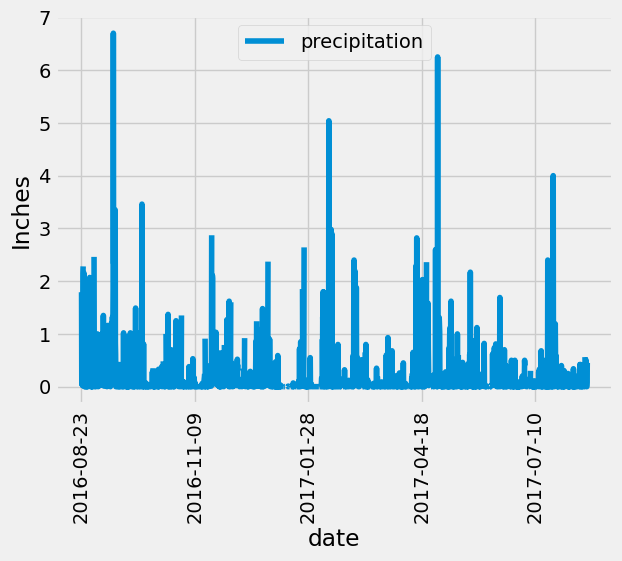

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date_as_date = dt.datetime.strptime(recent_date[0],'%Y-%m-%d')
recent_date_as_date = recent_date_as_date.date()

# Calculate the date one year from the last date in data set.
one_year = recent_date_as_date - dt.timedelta(days=365)
one_year_string = one_year.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date <=recent_date[0]).\
                filter(Measurement.date >=one_year_string).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_prcp_df = pd.DataFrame(results, columns=['date','precipitation']).set_index('date')

# Sort the dataframe by date
year_prcp_df = year_prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
year_prcp_df.plot(kind='line',rot=90)
plt.ylabel('Inches')

plt.show()

In [19]:
year_prcp_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_summary_stats = year_prcp_df.describe()
prcp_summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
stations = session.query(Measurement.station, Station.name).\
                    filter(Measurement.station == Station.station).\
                    group_by(Measurement.station)

In [37]:
pd.DataFrame(stations, columns=['Station ID','Station Name'])

,Station ID,Station Name
0,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00516128,"MANOA LYON ARBO 785.2, HI US"
4,USC00517948,"PEARL CITY, HI US"
5,USC00518838,"UPPER WAHIAWA 874.3, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00519397,"WAIKIKI 717.2, HI US"
8,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"


In [38]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(Measurement.station).distinct().count()
station_total

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_measurement_counts = session.query(Measurement.station, func.count(Measurement.station)).\
                                                group_by(Measurement.station).\
                                                order_by(func.count(Measurement.station).desc())
station_counts_df = pd.DataFrame(station_measurement_counts, columns=['station id','# of measurements'])
station_counts_df

,station id,# of measurements
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [40]:
station_measurement_counts[0][0]

'USC00519281'

In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_act_station_data = session.query(Measurement.station, func.min(Measurement.tobs),
                                      func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                        filter(Measurement.station == station_measurement_counts[0][0])
pd.DataFrame(most_act_station_data, columns=['Station ID','min temp','max temp','avg temp'])

,Station ID,min temp,max temp,avg temp
0,USC00519281,54.0,85.0,71.663781


In [49]:
station_target = station_measurement_counts[0][0]

In [51]:
# same as above using pd.read_sql()
df = pd.read_sql("Select station,\
                 min(tobs) AS min_temp,\
                 max(tobs) AS max_temp,\
                 avg(tobs) AS avg_temp \
                 FROM measurement WHERE station = 'USC00519281'", conn)
df

,station,min_temp,max_temp,avg_temp
0,USC00519281,54.0,85.0,71.663781


In [52]:
temp_data = session.query(Measurement.tobs)\
                    .filter(Measurement.date <= recent_date[0])\
                    .filter(Measurement.date >= one_year_string)\
                    .filter(Measurement.station == station_measurement_counts[0][0])\
                    .all()
temp_df = pd.DataFrame(temp_data, columns=['tobs'])
temp_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 1.0, 'Temperature Data for Station ID: USC00519281\n (2017-08-23 through 2016-08-24)')

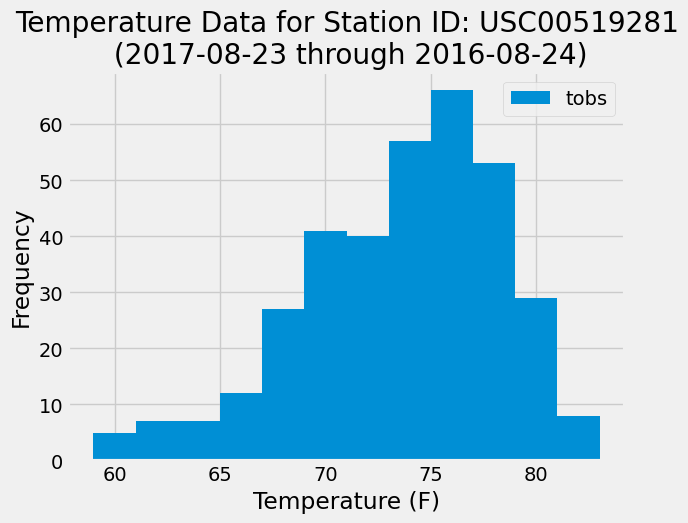

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df.plot(kind='hist', bins=12)
plt.xlabel('Temperature (F)')
plt.title('Temperature Data for Station ID: USC00519281\n (2017-08-23 through 2016-08-24)')

# Close Session

In [54]:
# Close Session
session.close()